# 财政收入预测分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#分析财政收入预测背景" data-toc-modified-id="分析财政收入预测背景-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>分析财政收入预测背景</a></span><ul class="toc-item"><li><span><a href="#财政收入简介和需求" data-toc-modified-id="财政收入简介和需求-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>财政收入简介和需求</a></span></li><li><span><a href="#财政收入预测数据基础情况" data-toc-modified-id="财政收入预测数据基础情况-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>财政收入预测数据基础情况</a></span></li><li><span><a href="#财政收入预测分析目标" data-toc-modified-id="财政收入预测分析目标-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>财政收入预测分析目标</a></span></li><li><span><a href="#财政收入预测的方法" data-toc-modified-id="财政收入预测的方法-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>财政收入预测的方法</a></span><ul class="toc-item"><li><span><a href="#最小二乘估计方法" data-toc-modified-id="最小二乘估计方法-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>最小二乘估计方法</a></span></li><li><span><a href="#Lasso特征选择方法" data-toc-modified-id="Lasso特征选择方法-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Lasso特征选择方法</a></span></li></ul></li><li><span><a href="#财政收入预测的步骤与流程" data-toc-modified-id="财政收入预测的步骤与流程-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>财政收入预测的步骤与流程</a></span></li></ul></li><li><span><a href="#相关性分析" data-toc-modified-id="相关性分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>相关性分析</a></span><ul class="toc-item"><li><span><a href="#Pearson（皮尔森）相关系数" data-toc-modified-id="Pearson（皮尔森）相关系数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pearson（皮尔森）相关系数</a></span></li><li><span><a href="#分析相关系数表" data-toc-modified-id="分析相关系数表-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>分析相关系数表</a></span></li><li><span><a href="#用图形分析相关性" data-toc-modified-id="用图形分析相关性-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>用图形分析相关性</a></span></li></ul></li><li><span><a href="#使用Lasso回归选取财政收入预测的关键特征(features)" data-toc-modified-id="使用Lasso回归选取财政收入预测的关键特征(features)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>使用Lasso回归选取财政收入预测的关键特征(features)</a></span><ul class="toc-item"><li><span><a href="#概念" data-toc-modified-id="概念-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>概念</a></span></li><li><span><a href="#基本原理" data-toc-modified-id="基本原理-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>基本原理</a></span></li><li><span><a href="#适用场景" data-toc-modified-id="适用场景-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>适用场景</a></span></li><li><span><a href="#Lasso回归方法优缺点" data-toc-modified-id="Lasso回归方法优缺点-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Lasso回归方法优缺点</a></span></li><li><span><a href="#python实现" data-toc-modified-id="python实现-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>python实现</a></span></li><li><span><a href="#分析系数表" data-toc-modified-id="分析系数表-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>分析系数表</a></span></li></ul></li><li><span><a href="#财政收入预测模型" data-toc-modified-id="财政收入预测模型-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>财政收入预测模型</a></span><ul class="toc-item"><li><span><a href="#灰色预测" data-toc-modified-id="灰色预测-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>灰色预测</a></span><ul class="toc-item"><li><span><a href="#概念" data-toc-modified-id="概念-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>概念</a></span></li><li><span><a href="#基本原理" data-toc-modified-id="基本原理-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>基本原理</a></span></li><li><span><a href="#适用场景" data-toc-modified-id="适用场景-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>适用场景</a></span></li><li><span><a href="#灰色预测优缺点" data-toc-modified-id="灰色预测优缺点-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>灰色预测优缺点</a></span></li></ul></li><li><span><a href="#SVR模型" data-toc-modified-id="SVR模型-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SVR模型</a></span><ul class="toc-item"><li><span><a href="#基本原理" data-toc-modified-id="基本原理-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>基本原理</a></span></li><li><span><a href="#适用场景" data-toc-modified-id="适用场景-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>适用场景</a></span></li><li><span><a href="#SVR算法优缺点" data-toc-modified-id="SVR算法优缺点-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>SVR算法优缺点</a></span></li><li><span><a href="#主要参数介绍" data-toc-modified-id="主要参数介绍-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>主要参数介绍</a></span></li><li><span><a href="#模型评价指标" data-toc-modified-id="模型评价指标-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>模型评价指标</a></span></li></ul></li></ul></li><li><span><a href="#总结" data-toc-modified-id="总结-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>总结</a></span></li></ul></div>

## 分析财政收入预测背景

### 财政收入简介和需求

- 财政收入，是指政府为履行其职能、实施公共政策和提供公共物品与服务需要而筹集的一切资金的总和。财政收入表现为政府部门在一定时期内（一般为一个财政年度）所取得的货币收入。财政收入是衡量一国政府财力的重要特征，政府在社会经济活动中提供公共物品和服务的范围和数量，在很大程度上取决于财政收入的充裕状况。
- 在我国现行的分税制财政管理体制下，地方财政收入不但是国家财政收入的重要组成部分，而且具有其相对独立的构成内容。如何制定地方财政支出计划，合理分配地方财政收入，促进地方的发展，提高市民的收入和生活质量是每个地方政府需要考虑的首要问题。因此，地方财政收入预测是非常必要的。

### 财政收入预测数据基础情况

考虑到数据的可得性，本项目所用的财政收入分为地方一般预算收入和政府性基金收入。地方一般预算收入包括以下2个部分。
- 税收收入。主要包括企业所得税与地方所得税中中央和地方共享的40%，地方享有的25%的增值税，营业税和印花税等。
- 非税收收入。包括专项收入、行政事业性收费、罚没收入、国有资本经营收入和其他收入等。

政府性基金收入是国家通过向社会征收以及出让土地、发行彩票等方式取得收入，并专项用于支持特定基础设施建设和社会事业发展的收入。

由于1994年我国对财政体制进行了重大改革，开始实行分税制财政体制，影响了财政收入相关数据的连续性，在1994年前后不具有可比性。由于没有合适的方法来调整这种数据的跃变，因此本项目仅对1994年至2013年的数据进行分析（本项目所用数据均来自《统计年鉴》）。
各项特征名称及特征说明如下（共13项）：

- **社会从业人数(x1)**：就业人数的上升伴随着居民消费水平的提高，从而间接影响财政收入的增加。
- **在岗职工工资总额(x2)**：反映的是社会分配情况，主要影响财政收入中的个人所得税、房产税以及潜在消费能力。
- **社会消费品零售总额(x3)**：代表社会整体消费情况，是可支配收入在经济生活中的实现。当社会消费品零售总额增长时，表明社会消费意愿强烈，部分程度上会导致财政收入中增值税的增长；同时当消费增长时，也会引起经济系统中其他方面发生变动，最终导致财政收入的增长。
- **城镇居民人均可支配收入(x4)**：居民收入越高消费能力越强，同时意味着其工作积极性越高，创造出的财富越多，从而能带来财政收入的更快和持续增长。
- **城镇居民人均消费性支出(x5)**：居民在消费商品的过程中会产生各种税费，税费又是调节生产规模的手段之一。在商品经济发达的如今，居民消费的越多，对财政收入的贡献就越大。
- **年末总人口(x6)**：在地方经济发展水平既定的条件下，人均地方财政收入与地方人口数呈反比例变化。
- **全社会固定资产投资额(x7)**：是建造和购置固定资产的经济活动，即固定资产再生产活动。主要通过投资来促进经济增长，扩大税源，进而拉动财政税收收入整体增长。
- **地区生产总值(x8)**：表示地方经济发展水平。一般来讲，政府财政收入来源于即期的地区生产总值。在国家经济政策不变、社会秩序稳定的情况下，地方经济发展水平与地方财政收入之间存在着密切的相关性，越是经济发达的地区，其财政收入的规模就越大。
- **第一产业产值(x9)**：取消农业税、实施三农政策，第一产业对财政收入的影响更小。
- **税收(x10)**：由于其具有征收的强制性、无偿性和固定性特点，可以为政府履行其职能提供充足的资金来源。因此，各国都将其作为政府财政收入的最重要的收入形式和来源。
- **居民消费价格指数(x11)**：反映居民家庭购买的消费品及服务价格水平的变动情况，影响城乡居民的生活支出和国家的财政收入。
- **第三产业与第二产业产值比(x12)**：表示产业结构。三次产业生产总值代表国民经济水平，是财政收入的主要影响因素，当产业结构逐步优化时，财政收入也会随之增加。
- **居民消费水平(x13)**：在很大程度上受整体经济状况GDP的影响，从而间接影响地方财政收入。

In [2]:
data = pd.read_csv('data.csv')
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,3831732,181.54,448.19,7571.00,6212.70,6370241,525.71,985.31,60.62,65.66,120.0,1.029,5321,64.87
1,3913824,214.63,549.97,9038.16,7601.73,6467115,618.25,1259.20,73.46,95.46,113.5,1.051,6529,99.75
2,3928907,239.56,686.44,9905.31,8092.82,6560508,638.94,1468.06,81.16,81.16,108.2,1.064,7008,88.11
3,4282130,261.58,802.59,10444.60,8767.98,6664862,656.58,1678.12,85.72,91.70,102.2,1.092,7694,106.07
4,4453911,283.14,904.57,11255.70,9422.33,6741400,758.83,1893.52,88.88,114.61,97.7,1.200,8027,137.32


### 财政收入预测分析目标

结合财政收入预测的需求分析，本次数据分析建模目标主要有以下2个：
1. 分析、识别影响地方财政收入的关键特征。
2. 预测2014年和2015年的财政收入。

### 财政收入预测的方法

#### 最小二乘估计方法

众多学者已经对财政收入的影响因素进行了研究，但是他们大多先建立财政收入与各待定的影响因素之间的多元线性回归模型，运用最小二乘估计方法来估计回归模型的系数，通过系数来检验它们之间的关系，模型的结果对数据的依赖程度很大，并且普通最小二乘估计求得的解往往是局部最优解，后续步骤的检验可能就会失去应有的意义。

#### Lasso特征选择方法

本项目在已有研究的基础上运用Lasso特征选择方法来研究影响地方财政收入的因素。在Lasso特征选择的基础上，鉴于灰色预测对少量数据预测的优良性能，对单个选定的影响因素建立灰色预测模型，得到它们在2014年及2015年的预测值。由于支持向量回归较强的适用性和容错能力，对历史数据建立训练模型，把灰色预测的数据结果代入训练完成的模型中，充分考虑历史数据信息，可以得到较为准确的预测结果，即2014年和2015年财政收入。

### 财政收入预测的步骤与流程

![fig1](fig/fig1.png)

本项目的总体流程如图所示，主要包括以下步骤:
1. 对原始数据进行探索性分析，了解原始特征之间的相关性。
2. 利用Lasso特征选择模型进行特征提取。
3. 建立单个特征的灰色预测模型以及支持向量回归预测模型。
4. 使用支持向量回归预测模型得出2014-2015年财政收入的预测值。
5. 对上述建立的财政收入预测模型进行评价。

## 相关性分析

### Pearson（皮尔森）相关系数

- 相关性分析是指对两个或多个具备相关性的特征元素进行分析，衡量两个特征因素的相关程度。
- 在统计学中，常用Pearson相关系数来进行相关性分析。
- Pearson相关系数是用来度量两个特征X和Y之间的相互关系（线性相关的强弱），是最简单的一种相关系数，通常用r或p表示，取值范围在[-1,1]之间。


**Pearson系数实际上就是两个变量之间的协方差和标准差的商**


- 计算：

![fig2](fig/fig2.png)

- 当0<r<1时，表示X和Y呈正相关关系;当-1<r<0时，表示X和Y呈负相关关系。若r=0,则X和Y不相关；若r=1/-1,则X和Y完全正/负相关。|r|越接近1，X和Y相关性越大。

- python实现：pandas提供了计算相关系数的统计功能，通过dataframe可以方便调用。参考：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [3]:
# pd.DataFrame.corr，method选择pearson
#相关系数矩阵为：
cor=data.corr(method = 'pearson')
cor

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,0.946127,0.946105,0.970858,0.971181,0.993656,0.953170,0.970053,0.983138,0.978001,-0.285738,0.935236,0.961951,0.938657
x2,0.946127,1.000000,0.997153,0.992443,0.989825,0.919806,0.990983,0.993305,0.979635,0.983910,-0.133694,0.887553,0.997097,0.984676
x3,0.946105,0.997153,1.000000,0.994579,0.992625,0.918570,0.996440,0.994398,0.981389,0.987977,-0.146433,0.887417,0.997129,0.992741
x4,0.970858,0.992443,0.994579,1.000000,0.998645,0.949673,0.993923,0.997624,0.992740,0.995424,-0.189866,0.907801,0.996877,0.987478
x5,0.971181,0.989825,0.992625,0.998645,1.000000,0.947662,0.992129,0.996991,0.994131,0.996364,-0.180938,0.896969,0.994758,0.988964
x6,0.993656,0.919806,0.918570,0.949673,0.947662,1.000000,0.927263,0.948254,0.967872,0.957005,-0.343653,0.948412,0.938881,0.909062
x7,0.953170,0.990983,0.996440,0.993923,0.992129,0.927263,1.000000,0.994891,0.982857,0.991463,-0.151829,0.887458,0.995589,0.994115
x8,0.970053,0.993305,0.994398,0.997624,0.996991,0.948254,0.994891,1.000000,0.993077,0.996786,-0.154884,0.897361,0.998159,0.988947
x9,0.983138,0.979635,0.981389,0.992740,0.994131,0.967872,0.982857,0.993077,1.000000,0.993905,-0.225543,0.907972,0.988529,0.975441
x10,0.978001,0.983910,0.987977,0.995424,0.996364,0.957005,0.991463,0.996786,0.993905,1.000000,-0.168262,0.903448,0.992369,0.986830


In [6]:
np.round(cor,1)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.0,0.9,0.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.3,0.9,1.0,0.9
x2,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,-0.1,0.9,1.0,1.0
x3,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,-0.1,0.9,1.0,1.0
x4,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,-0.2,0.9,1.0,1.0
x5,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,-0.2,0.9,1.0,1.0
x6,1.0,0.9,0.9,0.9,0.9,1.0,0.9,0.9,1.0,1.0,-0.3,0.9,0.9,0.9
x7,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,-0.2,0.9,1.0,1.0
x8,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,-0.2,0.9,1.0,1.0
x9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.2,0.9,1.0,1.0
x10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.2,0.9,1.0,1.0


### 分析相关系数表

由上表可知，居民消费价格指数（x11）与财政收入（y）的线性关系不显著，呈现负相关。其余特征均与财政收入呈现高度的正相关关系。

- 按与y的相关性大小（使用jupyter notebook的排序功能），依次是x7，x3，x5，x8，x8，x13，x4，x10，x2，x9，x1，x6，x12。
- 各特征之间存在着严重的多重共线性：
- 特征x1，x4，x5，x6，x8，x9，x10与除了x11之外的特征均存在严重的共线性。
- 特征x2，x3，x7与除了x11和x12外的其他特征存在着严重的多重共线性。
- x11与各特征的共线性不明显。
- x12与除了x2，x3，x7，x11之外的其他特征有严重的共线性。
- x13与除了x11之外的各特征有严重的共线性。
- x2和x3，x2和x13，x3和x13等多对特征之间存在完全的共线性。

由上述分析可知，选取的各特征除了x11外，其他特征与y的相关性很强，可以用作财政收入预测分析的关键特征，但这些特征之间存在着信息的重复，需要对特征进行进一步筛选。

### 用图形分析相关性

可以在图中将多个变量两两配对画图，以观察其相关性

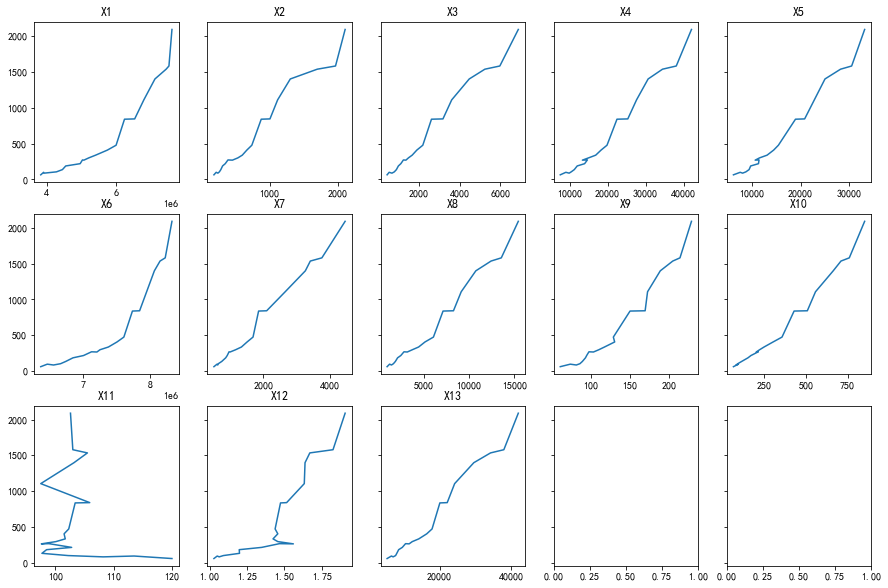

In [7]:
#把每个参数X1-X13与y的关系画出来
fig1,ax1=plt.subplots(3,5,figsize=(15,10),sharey=True)
for i in range(13):
    ax1[int(i/5)][i%5].plot(data.iloc[:,i],data['y'])
    ax1[int(i/5)][i%5].set_title('X%d'%(i+1))

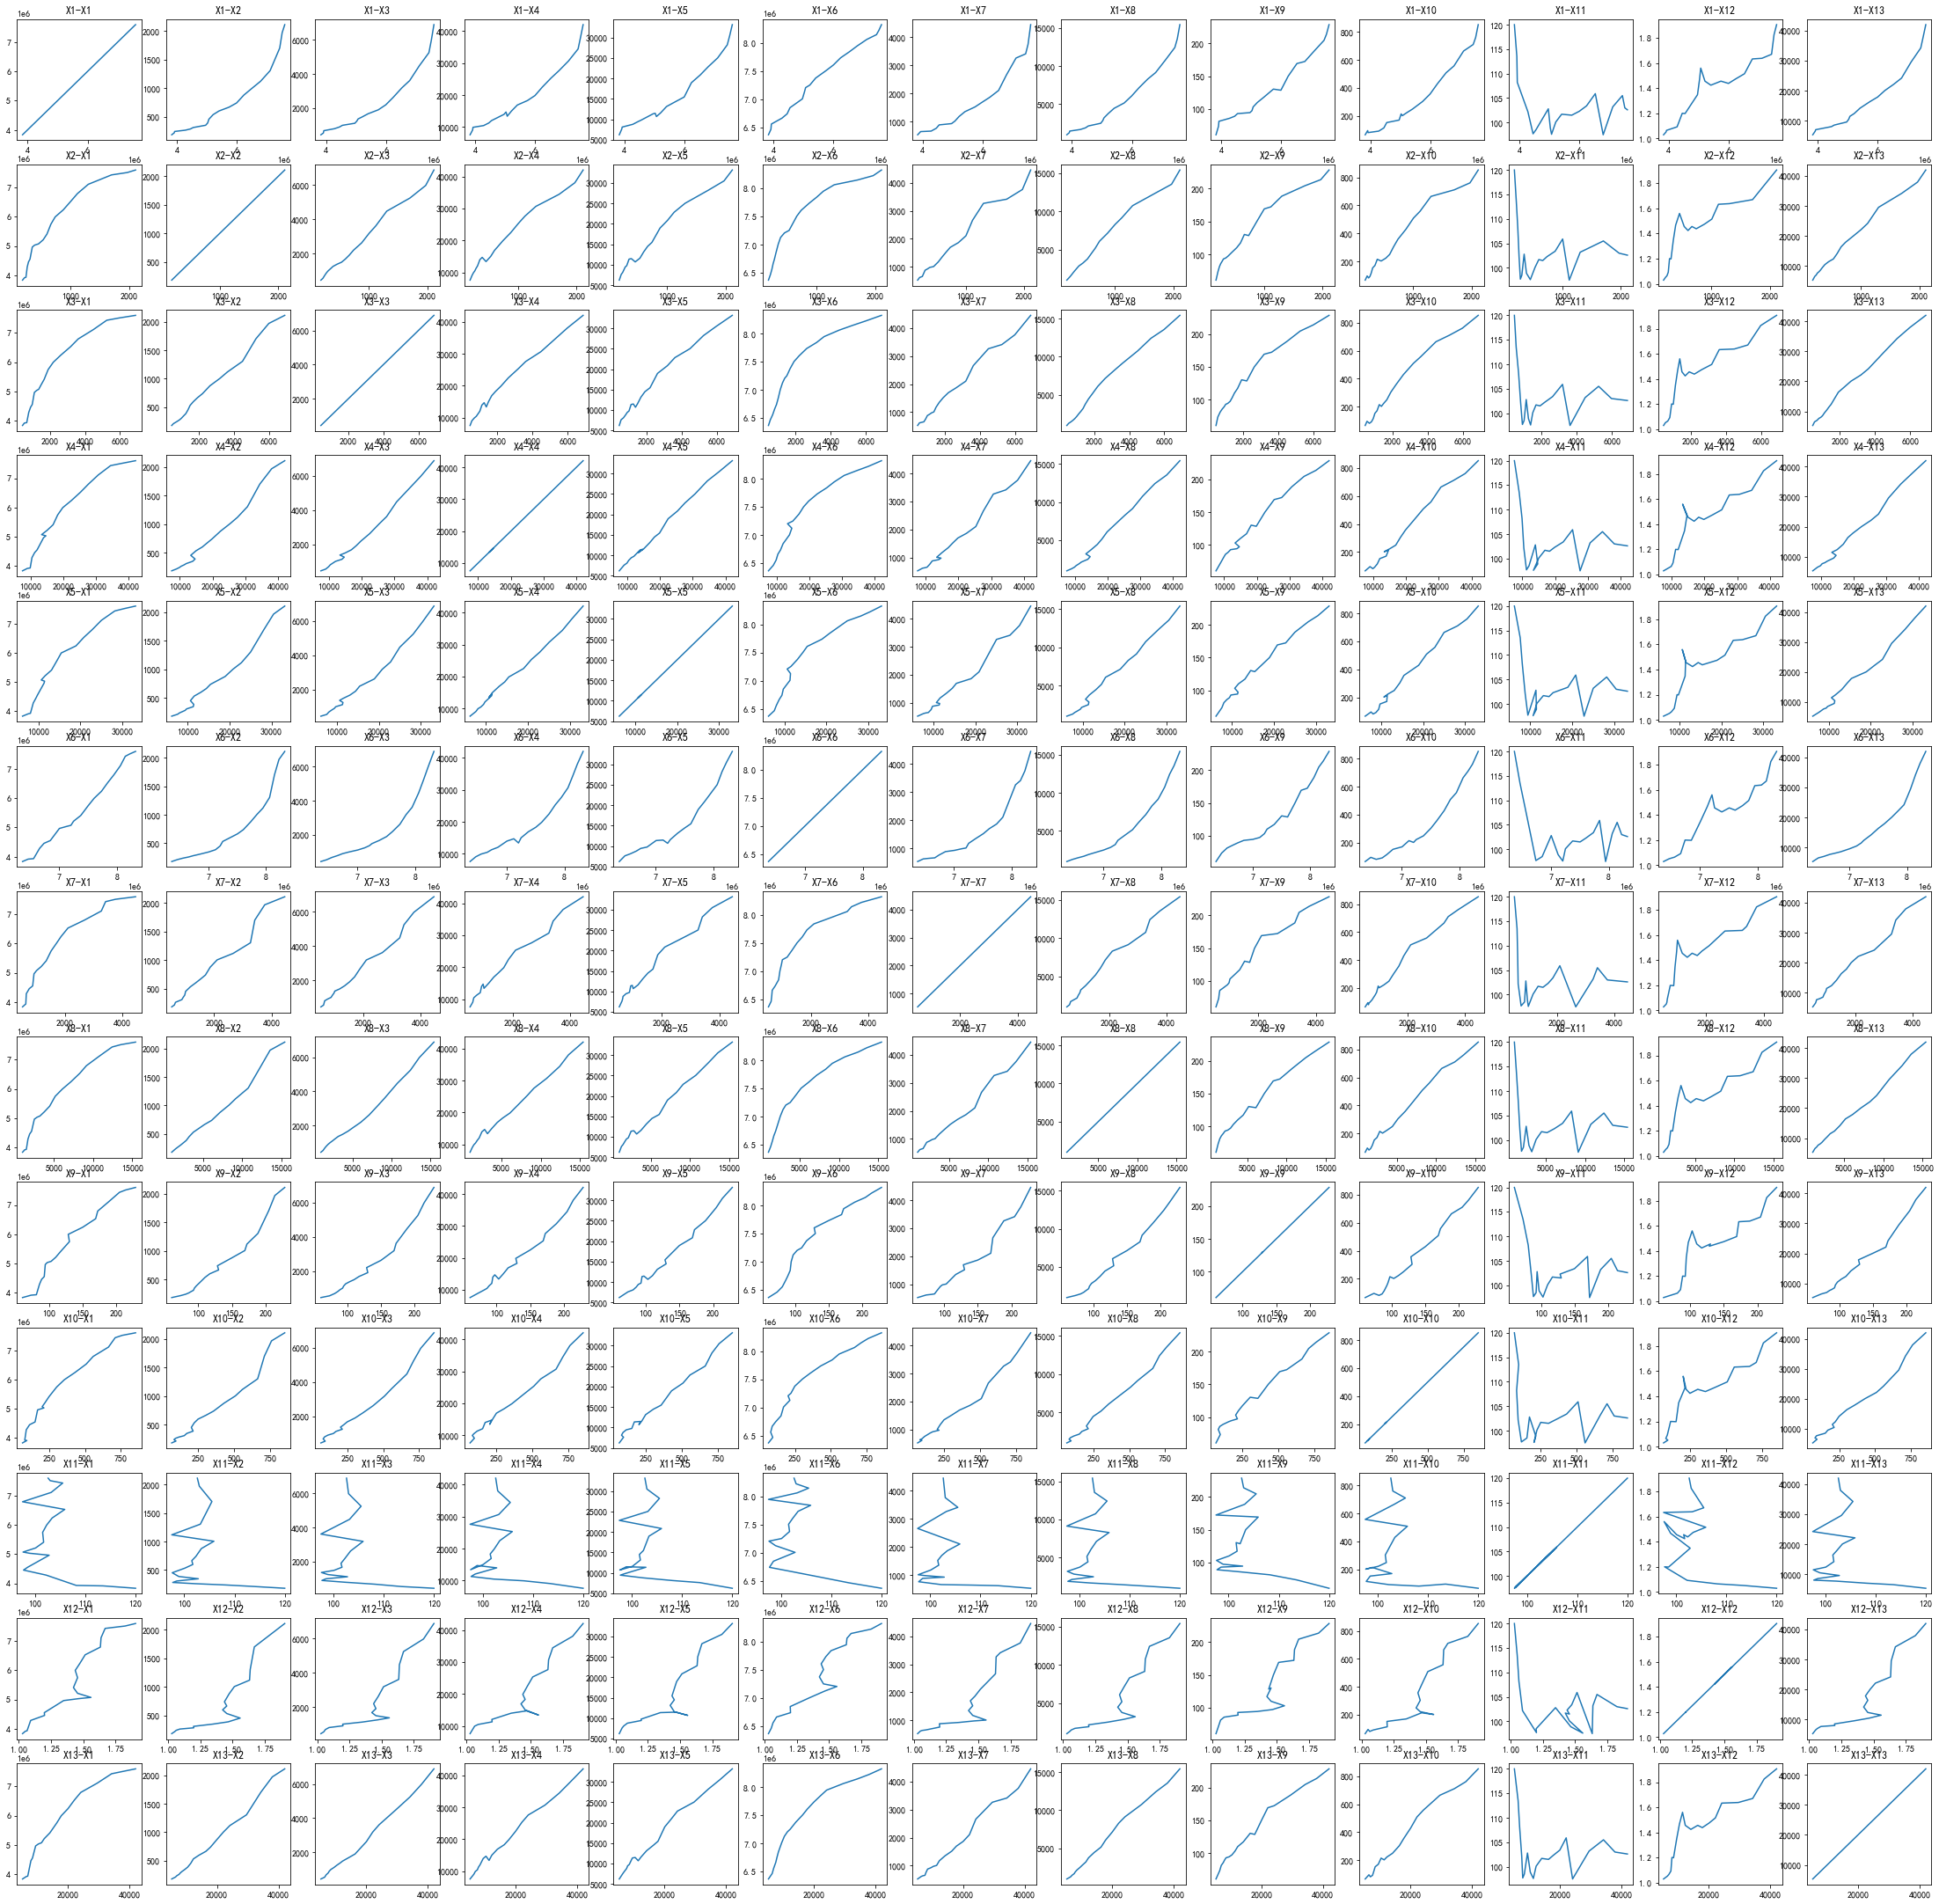

In [8]:
#把13个参数间的关系画出来
fig2,ax2=plt.subplots(13,13,figsize=(39,39))
for i in range(13):
    for j in range(13):
        ax2[i][j].plot(data.iloc[:,i],data.iloc[:,j])
        ax2[i][j].set_title('X%d-X%d'%(i+1,j+1))

## 使用Lasso回归选取财政收入预测的关键特征(features)

### 概念

- Lasso回归方法属于正则化方法的一种，是压缩估计。
- 它通过构造一个惩罚函数得到一个较为精炼的模型，使得它压缩一些系数，同时设定一些系数为零，保留了子集收缩的优点，是一种处理具有复共线性数据的有偏估计。

### 基本原理

- Lasso以缩小特征集（降阶）为思想，是一种收缩估计方法。
- Lasso方法可以将特征的系数进行压缩并使某些回归系数变为0，进而达到特征选择的目的，可以广泛地应用于模型改进与选择。
- 通过选择惩罚函数，借用Lasso思想和方法实现特征选择的目的。模型选择本质上是寻求模型稀疏表达的过程，而这种过程可以通过优化一个“损失”＋“惩罚”的函数问题来完成。
- Lasso参数估计被定义如下：

![fig3](fig/fig3.png)

- 其中，$\lambda$为非负正则参数，控制着模型的复杂程度，$\lambda$越大对特征较多的线性模型的惩罚力度就越大，从而最终获得一个特征较少的模型，加号右边为惩罚项。调整参数$\lambda$的确定可以采用交叉验证法，选取交叉验证误差最小的$\lambda$值。最后，按照得到的$\lambda$值，用全部数据重新拟合模型即可。

### 适用场景

- 当原始特征中存在多重共线性时，Lasso回归不失为一种很好的处理共线性的方法，它可以有效地对存在多重共线性的特征进行筛选。
- 在机器学习中，面对海量的数据，首先想到的就是降维，争取用尽可能少的数据解决问题，从这层意义上说，用Lasso模型进行特征选择也是一种有效的降维方法。
- Lasso从理论上说，对数据类型没有太多限制，可以接受任何类型的数据，而且一般不需要对特征进行标准化处理。

### Lasso回归方法优缺点

- 优点：可以弥补最小二乘法和逐步回归局部最优估计的不足，可以很好地进行特征的选择，可以有效地解决各特征之间存在多重共线性的问题。
- 缺点：如果存在一组高度相关的特征时，Lasso回归方法倾向于选择其中的一个特征，而忽视其他所有的特征，这种情况会导致结果的不稳定性。

虽然Lasso回归方法存在弊端，但是在合适的场景中还是可以发挥不错的效果。在财政收入预测中，各原始特征存在着严重的多重共线性，多重共线性问题已成为主要问题，这里采用Lasso回归方法进行特征选取是恰当的。

### python实现

sklearn的linear_model中有Lasso方法
参考：

- 英文https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- 中文https://sklearn.apachecn.org/docs/master/2.html

`class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')`

In [9]:
from sklearn.linear_model import Lasso

In [10]:
lasso = Lasso(1000,max_iter=10000)  #调用Lasso()函数，设置λ的值为1000

In [11]:
lasso.fit(data.iloc[:,0:13],data['y'])
lasso.coef_

array([-2.10664572e-04, -0.00000000e+00,  2.64000009e-02, -4.63012025e-02,
        9.08793148e-02,  1.53860034e-04,  3.62711861e-01,  3.18257744e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.10479788e-02])

In [12]:
mask = lasso.coef_ != 0  #返回一个相关系数是否为零的布尔数组
print('相关系数是否不为零：',mask)
print('相关系数非零个数为：',sum(mask))

相关系数是否不为零： [ True False  True  True  True  True  True  True False False False False
  True]
相关系数非零个数为： 8


### 分析系数表

由分析结果可见：X2,X9,X10,X11,X12不是关键性影响因素，可以从模型中删去，避免过度拟合（为了让回归曲线靠近一些无关点而改变形状/参数）。

利用Lasso回归方法识别影响财政收入的关键影响因素是社会从业人数（x1）、社会消费品零售总额（x3）、城镇居民人均可支配收入（x4）、城镇居民人均消费性支出（x5）、年末总人口(x6)、全社会固定资产投资额（x7）、地区生产总值（x8）和居民消费水平（x13）。

我们把筛选后的数据保存下来：

In [13]:
data.iloc[:,0:13].iloc[:, mask].to_csv('data2.csv')

## 财政收入预测模型

### 灰色预测

#### 概念

- 灰色预测法是一种对含有不确定因素的系统进行预测的方法。
- 在建立灰色预测模型之前，需先对原始时间序列进行数据处理，经过数据处理后的时间序列即称为生成列。
- 灰色系统常用的数据处理方式有累加和累减两种。

#### 基本原理

- 灰色预测是以灰色模型为基础，在众多灰色模型中，GM(1,1)模型最为常用。
- 设特征$X^{(0)}=\{X^{(0)}(i),i=1,2,3,...,n\}$为一非负原始数列

建立灰色预测模型：

1. 首先对$X^{(0)}$进行一次累加（1-AGO，Accumulating Generation Operator）得到一次累加序列$X^{(1)}=\{X^{(1)}(k),k=1,2,3,...,n\}$
2. 对$X^{(1)}$建立一阶线性微分方程，如下，即GM(1,1)模型：
$$\frac{dX^{(1)}}{dt}+aX^{(1)}=\mu$$
3. 求解微分方程，得到预测模型如下：
$$\hat{X}^{(1)}(k+1)=[\hat{X}^{(1)}(0)-\frac{\hat{u}}{\hat{a}}]e^{-\hat{a}k}+\frac{\hat{u}}{\hat{a}}$$
4. 由于GM(1,1)模型得到的是一次累加量，将GM(1,1)模型得到数据$\hat{X}^{(1)}(k+1)$经过累减还原为$\hat{X}^{(0)}(k+1)$，即$X^{(0)}$的灰色预测模型如下：
$$\hat{X}^{(0)}(k+1)=(e^{-\hat{a}}-1)[\hat{X}^{(0)}(n)-\frac{\hat{u}}{\hat{a}}]e^{-\hat{a}k}$$

**GM(1,1)有很多现成的代码实现，可以直接从网上找到**

In [14]:
def GM11(x0): #自定义灰色预测函数
  import numpy as np
  x1 = x0.cumsum() #1-AGO序列
  z1 = (x1[:len(x1)-1] + x1[1:])/2.0 #紧邻均值（MEAN）生成序列
  z1 = z1.reshape((len(z1),1))
  B = np.append(-z1, np.ones_like(z1), axis = 1)
  Yn = x0[1:].reshape((len(x0)-1, 1))
  [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) #计算参数
  f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2)) #还原值
  delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))
  C = delta.std()/x0.std()
  P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
  return f, a, b, x0[0], C, P #返回灰色预测函数、a、b、首项、方差比、小残差概率

GM(1,1)后验差检验模型精度如下表所示


| P      | C      | 模型精度 |
|--------|--------|------|
| >0\.95 | <0\.35 | 好    |
| >0\.80 | <0\.5  | 合格   |
| >0\.70 | <0\.65 | 勉强合格 |
| <0\.70 | >0\.65 | 不合格  |

#### 适用场景

灰色预测法的通用性比较强些，一般的时间序列场合都可以用，尤其适合那些规律性差且不清楚数据产生机理的情况。

#### 灰色预测优缺点

- **优点**：具有预测精度高、模型可检验、参数估计方法简单、对小数据集有很好的预测效果。
- **缺点**：对原始数据序列的光滑度要求很高，在原始数据列光滑性较差的情况下灰色预测模型的预测精度不高甚至通不过检验，结果只能放弃使用灰色模型进行预测。

操作思路：对每一列自变量进行预测，再使用预测得到的自变量来计算因变量

In [15]:
# 读取原始数据和筛选后的数据
data=pd.read_csv('data.csv')
data2=pd.read_csv('data2.csv',index_col=0)
data2.head()

,x1,x3,x4,x5,x6,x7,x8,x13
0,3831732,448.19,7571.00,6212.70,6370241,525.71,985.31,5321
1,3913824,549.97,9038.16,7601.73,6467115,618.25,1259.20,6529
2,3928907,686.44,9905.31,8092.82,6560508,638.94,1468.06,7008
3,4282130,802.59,10444.60,8767.98,6664862,656.58,1678.12,7694
4,4453911,904.57,11255.70,9422.33,6741400,758.83,1893.52,8027


In [16]:
#添加一列y用于预测
data2['y-gm']=data['y']
data2.head()

,x1,x3,x4,x5,x6,x7,x8,x13,y-gm
0,3831732,448.19,7571.00,6212.70,6370241,525.71,985.31,5321,64.87
1,3913824,549.97,9038.16,7601.73,6467115,618.25,1259.20,6529,99.75
2,3928907,686.44,9905.31,8092.82,6560508,638.94,1468.06,7008,88.11
3,4282130,802.59,10444.60,8767.98,6664862,656.58,1678.12,7694,106.07
4,4453911,904.57,11255.70,9422.33,6741400,758.83,1893.52,8027,137.32


In [17]:
#把index改成年份，把需要预测的数据先设为None
data2.index = range(1994, 2014)
data2.loc[2014] = None
data2.loc[2015] = None
data2

,x1,x3,x4,x5,x6,x7,x8,x13,y-gm
1994,3831732.0,448.19,7571.00,6212.70,6370241.0,525.71,985.31,5321.0,64.87
1995,3913824.0,549.97,9038.16,7601.73,6467115.0,618.25,1259.20,6529.0,99.75
1996,3928907.0,686.44,9905.31,8092.82,6560508.0,638.94,1468.06,7008.0,88.11
1997,4282130.0,802.59,10444.60,8767.98,6664862.0,656.58,1678.12,7694.0,106.07
1998,4453911.0,904.57,11255.70,9422.33,6741400.0,758.83,1893.52,8027.0,137.32
1999,4548852.0,1000.69,12018.52,9751.44,6850024.0,878.26,2139.18,8549.0,188.14
2000,4962579.0,1121.13,13966.53,11349.47,7006896.0,923.67,2492.74,9566.0,219.91
2001,5029338.0,1248.29,14694.00,11467.35,7125979.0,978.21,2841.65,10473.0,271.91
2002,5070216.0,1370.68,13380.47,10671.78,7206229.0,1009.24,3203.96,11469.0,269.10
2003,5210706.0,1494.27,15002.59,11570.58,7251888.0,1175.17,3758.62,12360.0,300.55


In [18]:
#对每一列自变量进行灰色预测
for i in data2.columns:
    f=GM11(data2.loc[range(1994, 2014),i].values)[0]
    data2.loc[2014,i] = f(len(data2)-1)#2014年预测结果
    data2.loc[2015,i] = f(len(data2)) ##2015年预测结果
data2

,x1,x3,x4,x5,x6,x7,x8,x13,y-gm
1994,3.831732e+06,448.190000,7571.000000,6212.700000,6.370241e+06,525.710000,985.310000,5321.000000,64.870000
1995,3.913824e+06,549.970000,9038.160000,7601.730000,6.467115e+06,618.250000,1259.200000,6529.000000,99.750000
1996,3.928907e+06,686.440000,9905.310000,8092.820000,6.560508e+06,638.940000,1468.060000,7008.000000,88.110000
1997,4.282130e+06,802.590000,10444.600000,8767.980000,6.664862e+06,656.580000,1678.120000,7694.000000,106.070000
1998,4.453911e+06,904.570000,11255.700000,9422.330000,6.741400e+06,758.830000,1893.520000,8027.000000,137.320000
1999,4.548852e+06,1000.690000,12018.520000,9751.440000,6.850024e+06,878.260000,2139.180000,8549.000000,188.140000
2000,4.962579e+06,1121.130000,13966.530000,11349.470000,7.006896e+06,923.670000,2492.740000,9566.000000,219.910000
2001,5.029338e+06,1248.290000,14694.000000,11467.350000,7.125979e+06,978.210000,2841.650000,10473.000000,271.910000
2002,5.070216e+06,1370.680000,13380.470000,10671.780000,7.206229e+06,1009.240000,3203.960000,11469.000000,269.100000
2003,5.210706e+06,1494.270000,15002.590000,11570.580000,7.251888e+06,1175.170000,3758.620000,12360.000000,300.550000


In [19]:
data2['y-gm']

1994      64.870000
1995      99.750000
1996      88.110000
1997     106.070000
1998     137.320000
1999     188.140000
2000     219.910000
2001     271.910000
2002     269.100000
2003     300.550000
2004     338.450000
2005     408.860000
2006     476.720000
2007     838.990000
2008     843.140000
2009    1107.670000
2010    1399.160000
2011    1535.140000
2012    1579.680000
2013    2088.140000
2014    2613.721471
2015    3128.770375
Name: y-gm, dtype: float64

In [20]:
#将原y值并入数据集，用于下一步预测
y = list(data['y'].values) ## 提取财政收入列，合并至新数据框中
y.extend([np.nan,np.nan])
data2['y'] = y
print('预测结果为：',data2.loc[2014:2015,:]) ##预测结果展示

预测结果为：                 x1           x3            x4            x5            x6  \
2014  8.142148e+06  7042.313018  43611.843582  35046.625962  8.505523e+06   
2015  8.460489e+06  8166.916380  47792.217079  38384.217945  8.627139e+06   

               x7            x8           x13         y-gm   y  
2014  4600.404822  18686.277051  44506.471782  2613.721471 NaN  
2015  5214.780293  21474.466946  49945.882085  3128.770375 NaN  


### SVR模型

#### 基本原理

![fig4](fig/fig4.png)

#### 适用场景

- 由于支持向量机拥有完善的理论基础和良好的特性，人们对其进行了广泛的研究和应用，涉及分类、回归、聚类、时间序列分析、异常点检测等诸多方面。
- 具体的研究内容包括统计学习理论基础、各种模型的建立、相应优化算法的改进以及实际应用。
- 支持向量回归也在这些研究中得到了发展和逐步完善，已有许多富有成果的研究工作。

#### SVR算法优缺点

- **优点**：支持向量回归不仅适用于线性模型，对于数据和特征之间的非线性关系也能很好抓住；持向量回归不需要担心多重共线性问题，可以避免局部极小化问题，提高泛化性能，解决高维问题；支持向量回归虽然不会在过程中直接排除异常点，但会使得由异常点引起的偏差更小。
- **缺点**：计算复杂度高，在面临数据量大的时候，计算耗时长。

#### 主要参数介绍

sklearn库的LinearSVR函数实现了线性支持向量回归，其使用语法如下：

`class sklearn.svm.LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=1000)`

其中：

| 参数名称               | 说明                                                                |
|--------------------|-------------------------------------------------------------------|
| epsilon            | 接收float。用于loss参数中的 参数。默认为0\.1。                                    |
| tol                | 接收float。指定终止迭代的阈值。默认为0\.0001。                                     |
| C                  | 接收float。表示罚项系数。默认为1\.0。                                           |
| loss               | 接收str。表示损失函数。 epsilon_insensitive是标准SVR                             |
| fit\_intercept     | 接收boolean。表示是否计算模型的截距。默认为True。                                    |
| intercept\_scaling | 接收float。                                                                  |
| dual               | 接收boolear。选择解决对偶问题或原始问题。如果为True，则解决对偶问题；如果是False，则解决原始问题。默认为True。 |
| verbose            | 接收int。表示是否开启verbose输出。默认为0。                                       |
| random\_state      | 输入int，或者一个RandomState实例，或者None。表示使用的随机数生成器的种子。默认为None。            |
| max\_iter          | 接收int。指定最大迭代次数。默认为1000。                                           |


In [21]:
from sklearn.svm import LinearSVR

In [22]:
data_train = data2.loc[range(1994,2014)].copy()#取1994-2013年的数据建模
data_mean = data_train.mean() #计算平均值
data_std = data_train.std() #计算标准差
data_train = (data_train - data_mean)/data_std #数据标准化 N（0，1）
data_train

,x1,x3,x4,x5,x6,x7,x8,x13,y-gm,y
1994,-1.384721,-1.001807,-1.183344,-1.177868,-1.577670,-1.001532,-1.054057,-1.075938,-0.908018,-0.908018
1995,-1.319682,-0.948774,-1.039547,-1.008469,-1.421759,-0.923420,-0.992899,-0.967199,-0.850768,-0.850768
1996,-1.307732,-0.877665,-0.954558,-0.948579,-1.271451,-0.905956,-0.946262,-0.924082,-0.869873,-0.869873
1997,-1.027884,-0.817144,-0.901702,-0.866240,-1.103501,-0.891067,-0.899357,-0.862331,-0.840394,-0.840394
1998,-0.891787,-0.764006,-0.822206,-0.786439,-0.980320,-0.804759,-0.851259,-0.832356,-0.789102,-0.789102
1999,-0.816568,-0.713922,-0.747442,-0.746302,-0.805498,-0.703950,-0.796405,-0.785368,-0.705689,-0.705689
2000,-0.488784,-0.651165,-0.556517,-0.551415,-0.553025,-0.665620,-0.717457,-0.693822,-0.653543,-0.653543
2001,-0.435893,-0.584907,-0.485218,-0.537039,-0.361370,-0.619583,-0.639547,-0.612178,-0.568193,-0.568193
2002,-0.403507,-0.521135,-0.613957,-0.634063,-0.232215,-0.593391,-0.558646,-0.522522,-0.572805,-0.572805
2003,-0.292201,-0.456737,-0.454973,-0.524450,-0.158730,-0.453332,-0.434793,-0.442319,-0.521184,-0.521184


In [23]:
feature = ['x1', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x13']
x_train = data_train[feature].values #特征数据
y_train = data_train['y'].values #标签数据

In [24]:
linearsvr = LinearSVR(max_iter=10000)   #调用LinearSVR()函数
linearsvr.fit(x_train,y_train) #进行拟合
x = ((data2[feature] - data_mean[feature])/data_std[feature]).values  #预测，并还原结果。
data2[u'y_pred'] = linearsvr.predict(x) * data_std['y'] + data_mean['y']

In [25]:
data2

,x1,x3,x4,x5,x6,x7,x8,x13,y-gm,y,y_pred
1994,3.831732e+06,448.190000,7571.000000,6212.700000,6.370241e+06,525.710000,985.310000,5321.000000,64.870000,64.87,34.940985
1995,3.913824e+06,549.970000,9038.160000,7601.730000,6.467115e+06,618.250000,1259.200000,6529.000000,99.750000,99.75,82.875242
1996,3.928907e+06,686.440000,9905.310000,8092.820000,6.560508e+06,638.940000,1468.060000,7008.000000,88.110000,88.11,95.522401
1997,4.282130e+06,802.590000,10444.600000,8767.980000,6.664862e+06,656.580000,1678.120000,7694.000000,106.070000,106.07,105.929972
1998,4.453911e+06,904.570000,11255.700000,9422.330000,6.741400e+06,758.830000,1893.520000,8027.000000,137.320000,137.32,150.379299
1999,4.548852e+06,1000.690000,12018.520000,9751.440000,6.850024e+06,878.260000,2139.180000,8549.000000,188.140000,188.14,188.148175
2000,4.962579e+06,1121.130000,13966.530000,11349.470000,7.006896e+06,923.670000,2492.740000,9566.000000,219.910000,219.91,219.809634
2001,5.029338e+06,1248.290000,14694.000000,11467.350000,7.125979e+06,978.210000,2841.650000,10473.000000,271.910000,271.91,231.799140
2002,5.070216e+06,1370.680000,13380.470000,10671.780000,7.206229e+06,1009.240000,3203.960000,11469.000000,269.100000,269.10,219.390463
2003,5.210706e+06,1494.270000,15002.590000,11570.580000,7.251888e+06,1175.170000,3758.620000,12360.000000,300.550000,300.55,300.478414


In [26]:
## SVR预测后结果
print('真实值与GM预测值和SVR预测值分别为：\n',data2[['y','y-gm','y_pred']])

真实值与GM预测值和SVR预测值分别为：
             y         y-gm       y_pred
1994    64.87    64.870000    34.940985
1995    99.75    99.750000    82.875242
1996    88.11    88.110000    95.522401
1997   106.07   106.070000   105.929972
1998   137.32   137.320000   150.379299
1999   188.14   188.140000   188.148175
2000   219.91   219.910000   219.809634
2001   271.91   271.910000   231.799140
2002   269.10   269.100000   219.390463
2003   300.55   300.550000   300.478414
2004   338.45   338.450000   383.932744
2005   408.86   408.860000   462.497477
2006   476.72   476.720000   553.725440
2007   838.99   838.990000   690.717101
2008   843.14   843.140000   843.140000
2009  1107.67  1107.670000  1086.708484
2010  1399.16  1399.160000  1376.790266
2011  1535.14  1535.140000  1535.259868
2012  1579.68  1579.680000  1740.414996
2013  2088.14  2088.140000  2088.135480
2014      NaN  2613.721471  2184.963915
2015      NaN  3128.770375  2535.067863


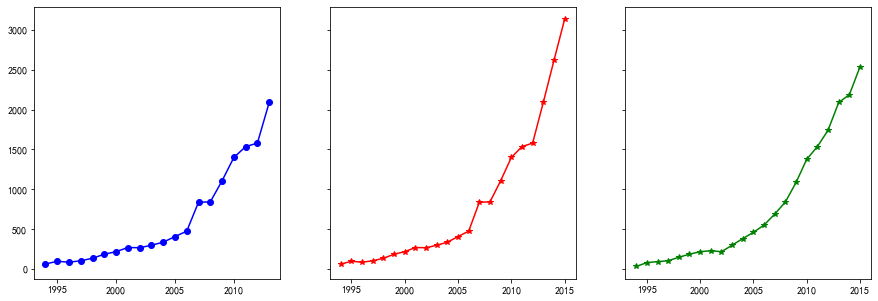

In [27]:
fig_pred,ax_pred=plt.subplots(1,3,figsize=(15,5),sharey=True)
ax_pred[0].plot(data2['y'],'b-o')
ax_pred[1].plot(data2['y-gm'],'r-*')
ax_pred[2].plot(data2['y_pred'],'g-*')

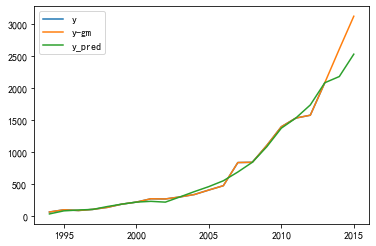

In [28]:
fig,ax=plt.subplots()
data2[['y','y-gm','y_pred']].plot(ax=ax)
ax.legend()

#### 模型评价指标

In [29]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score

In [30]:
#可解释方差值
explained_variance_score(data2['y'][:-2],data2['y_pred'][:-2])

0.9907722317563931

In [31]:
#平均绝对误差
mean_absolute_error(data2['y'][:-2],data2['y_pred'][:-2])

34.300260994414245

In [32]:
#中值绝对误差
median_absolute_error(data2['y'][:-2],data2['y_pred'][:-2])

18.918137248313315

In [33]:
data2['y'].mean()
#误差和均值对比，5%左右

618.0840000000001

In [34]:
#R方值
r2_score(data2['y'][:-2],data2['y_pred'][:-2])

0.9907663041037652

可以看出平均绝对误差与中值绝对误差较小，可解释方差值与R方值十分接近1，表明建立的支持向量回归模型拟合效果优良，可以用于预测财政收入。

## 总结

- 本项目财政收入预测，主要介绍了原始数据的相关性分析、特征的选取、构建灰色预测和支持向量回归预测模型、模型的评价四部分内容。
- 在财政收入相关数据的相关性分析中，采用了简单相关系数对数据进行了分析。
- 在特征选取中，运用了广泛使用的Lasso回归模型。
- 在模型的构建阶段，针对历史数据首先构建了灰色预测模型，对所选特征的2014年与2015年的值进行预测。然后根据所选特征的原始数据与预测值，建立支持向量回归模型，得到财政收入的最终预测值。
- 最后用平均绝对误差、中值绝对误差、可解释方差值和R方值进行模型的评价。
- 本项目建立的财政收入预测模型，很好的拟合了财政收入的变化情况。同时，模型还具有很高的预测精度，可以用来指导实际的工作。